In [1]:
%matplotlib inline
import pandas as pd 


In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.read_csv('titles.csv',index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [6]:
cast = pd.read_csv('cast.csv',index_col=None)
cast.head

<bound method NDFrame.head of                                     title  year                         name  \
0                          Closet Monster  2015                     Buffy #1   
1                         Suuri illusioni  1985                       Homo $   
2                     Battle of the Sexes  2017                      $hutter   
3                    Secret in Their Eyes  2015                      $hutter   
4                              Steve Jobs  2015                      $hutter   
...                                   ...   ...                          ...   
3786171                           Foxtrot  1988            Lilja ??risd?ttir   
3786172  Niceland (Population. 1.000.002)  2004    Sigr??ur J?na ??risd?ttir   
3786173                         Skammdegi  1985           Dalla ??r?ard?ttir   
3786174                      U.S.S.S.S...  2003  Krist?n Andrea ??r?ard?ttir   
3786175                 Bye Bye Blue Bird  1999                 Rosa ? R?gvu   

         

# 1 Using groupby(), plot the number of films that have been released each decade in the history of cinema.

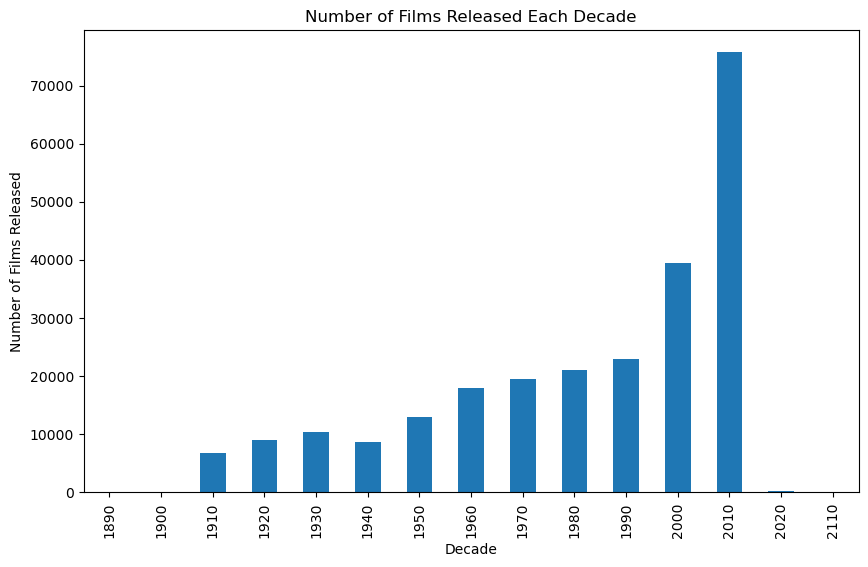

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
titles = pd.read_csv('titles.csv')
titles['decade'] = (titles['year'] // 10) * 10

films_per_decade = titles.groupby('decade').size()
films_per_decade.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decade')
plt.ylabel('Number of Films Released')
plt.title('Number of Films Released Each Decade')
plt.show()


# 2 Use groupby() to plot the number of "Hamlet" films made each decade.

C:\Users\hp\AppData\Local\Temp\ipykernel_7796\2922716390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_movies['decade'] = (hamlet_movies['year'] // 10) * 10


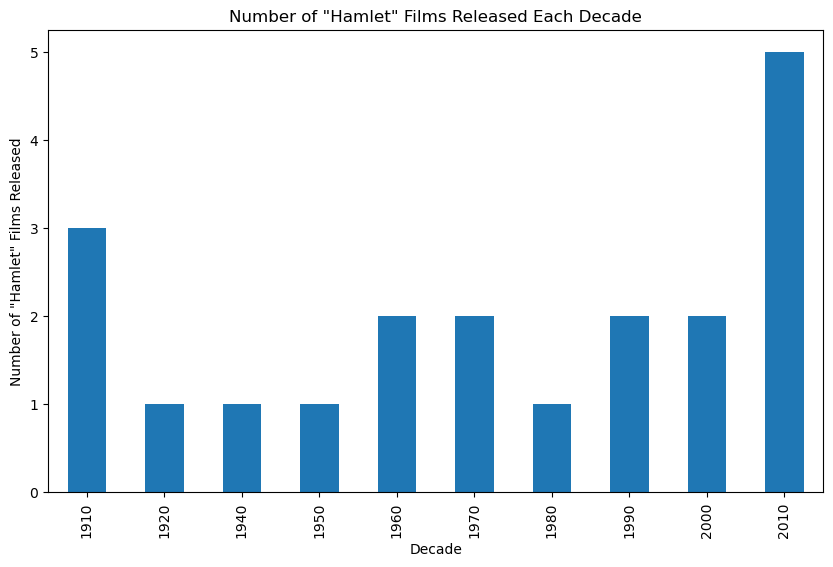

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
titles = pd.read_csv('titles.csv')
hamlet_movies = titles[titles['title'] == 'Hamlet']
hamlet_movies['decade'] = (hamlet_movies['year'] // 10) * 10
hamlet_films_per_decade = hamlet_movies.groupby('decade').size()

hamlet_films_per_decade.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films Released')
plt.title('Number of "Hamlet" Films Released Each Decade')
plt.show()


# 3How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

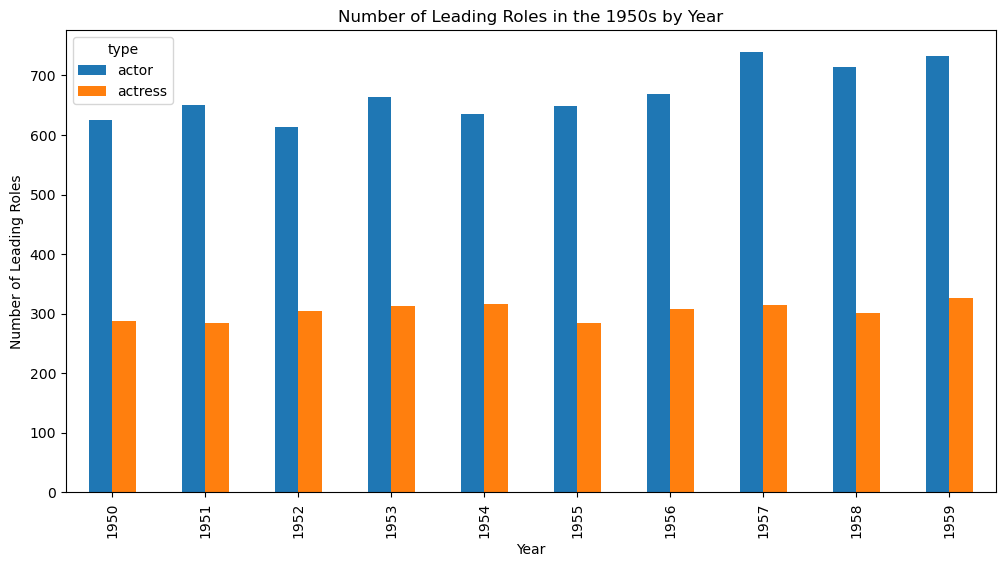

In [11]:
leading_roles_1950s = cast[(cast['n'] == 1) & (cast['year'] >= 1950) & (cast['year'] <= 1959)]
leading_roles_by_year = leading_roles_1950s.groupby(['year', 'type']).size()
leading_roles_by_year = leading_roles_by_year.unstack()
leading_roles_by_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Leading Roles')
plt.title('Number of Leading Roles in the 1950s by Year')
plt.show()


# 4 In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

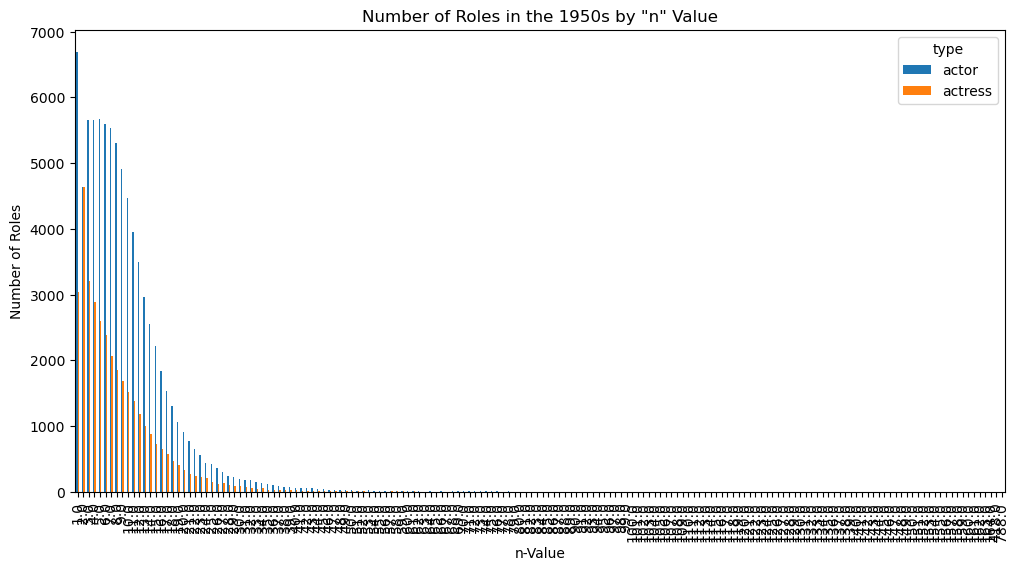

In [12]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]
roles_by_n_and_type = roles_1950s.groupby(['n', 'type']).size()
roles_by_n_and_type = roles_by_n_and_type.unstack()
roles_by_n_and_type.plot(kind='bar', figsize=(12, 6))
plt.xlabel('n-Value')
plt.ylabel('Number of Roles')
plt.title('Number of Roles in the 1950s by "n" Value')
plt.show()


# 5 Use groupby() to determine how many roles are listed for each of the Pink Panther movies

In [13]:
pink_panther_movies = cast[cast['title'].str.contains('Pink Panther', case=False)]
roles_per_pink_panther_movie = pink_panther_movies.groupby('title').size()
roles_per_pink_panther_movie


title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64

# 6 List, in order by year, each of the films in which Frank Oz has played more than 1 role.


In [ ]:
import pandas as pd
cast = pd.read_csv('cast.csv')
frank_oz_roles = cast[cast['name'] == 'Frank Oz']
roles_per_film = frank_oz_roles.groupby('title').size()

films_with_multiple_roles = roles_per_film[roles_per_film > 1]

films_with_multiple_roles = films_with_multiple_roles.reset_index()
films_with_multiple_roles = films_with_multiple_roles.sort_values(by='year')
films_with_multiple_roles[['title', 'year']]


# 7 List each of the characters that Frank Oz has portrayed at least twice.

In [16]:
import pandas as pd
cast = pd.read_csv('cast.csv')
frank_oz_roles = cast[cast['name'] == 'Frank Oz']
character_counts = frank_oz_roles['character'].value_counts()
characters_at_least_twice = character_counts[character_counts >= 2]
characters_at_least_twice.index.tolist()


['Miss Piggy',
 'Yoda',
 'Animal',
 'Cookie Monster',
 'Sam the Eagle',
 'Fozzie Bear',
 'Bert',
 'Grover']